In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
trainDF = pd.read_csv('train.csv')
testDF = pd.read_csv('test.csv')


In [3]:
trainDF.head()


,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182


In [5]:
testDF.head()


,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,96,239,337,407,537,740,839,928,1047,...,1831,1951,2032,2138,2430,2496,2567,2691,2824,2919
1,0,87,248,319,515,590,734,803,912,983,...,1839,1911,2103,2174,2383,2487,2575,2647,2815,2886
2,0,90,234,312,404,512,667,767,843,940,...,1572,1675,1771,1890,1948,2043,2147,2255,2540,2683
3,0,193,240,356,407,526,607,732,712,769,...,1600,1728,1744,1832,1904,2063,2148,2258,2336,2501
4,0,74,324,394,555,629,926,1026,1194,1328,...,2626,2754,2922,3068,3154,3259,3386,3453,3618,3698


In [7]:
trainDF1 = trainDF
for i in range(1, 13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - \
        trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - \
        trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - \
        trainDF1['press-'+str(i)]

testDF1 = testDF
for i in range(1, 13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - \
        testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - \
        testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - \
        testDF1['press-'+str(i)]


In [10]:
trainDF1.head()


,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
0,1,0,120,216,312,424,496,592,664,808,...,72,48,72,96,48,48,72,72,48,72
1,1,0,95,168,265,360,455,527,599,736,...,72,71,71,71,56,48,47,72,72,48
2,1,0,71,143,231,783,903,1087,1159,1351,...,72,103,72,96,79,72,72,72,72,55
3,1,0,95,144,263,353,431,760,832,1159,...,72,48,50,91,47,72,48,72,72,72
4,1,0,70,166,238,310,406,526,598,710,...,72,48,72,96,72,72,62,72,72,96


In [8]:
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]


<h3>Gives the max and min values of user, press-0, release-0</h3>

In [11]:
temp1 = pd.DataFrame({'Min': trainDF2.min(), 'Max': trainDF2.max()})
temp1.head()


,Min,Max
user,1,5
press-0,0,0
release-0,0,120
press-1,0,253
release-1,78,360


<h2>Scatterplot of PPD vs RPD</h2>

Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

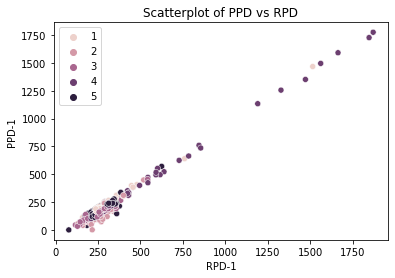

In [12]:
for i in range(1, 13):
    ax = sns.scatterplot(x='RPD-'+str(i), y='PPD-' +
                         str(i), hue='user', data=trainDF2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')


<h2>Swarm plots of RPD, PPD, HD</h2>

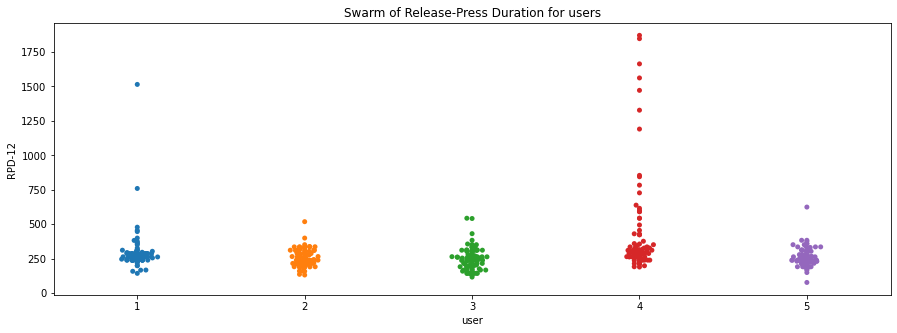

In [13]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

In [14]:
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1, 13)] + ['RPD-'+str(
    i) for i in range(1, 13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis, [
                                      'press-', 'HD-'], i='id', j='key_no').sort_values(by=['user', 'id', 'key_no'])
trainDF_HD_analysis


user  press-  HD-
id key_no                   
0  0          1       0  120
   1          1     216   96
   2          1     424   72
   3          1     592   72
   4          1     808   48
...         ...     ...  ...
39 8          5    1267   43
   9          5    1420   82
   10         5    1574   72
   11         5    1710   96
   12         5    1950   73

[520 rows x 3 columns]

ValueError: Illegal format string "PPD-12"; two marker symbols

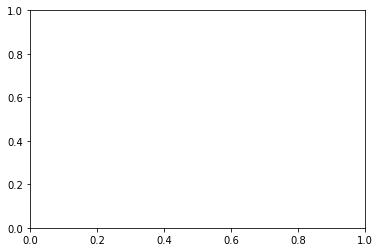

In [15]:
x = 'RPD-'+ str(i)
y = 'PPD-' +str(i)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
